In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

In [5]:
print(train_df.columns.values)
train_df.head()
train_df.info()
print('__'*40)
test_df.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Attalah, Mr. Sleiman",male,1601,G6,S
freq,1,577,7,4,644


In [7]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [8]:
#groupby同じ値を持つデータをまとめて、それぞれの塊に対して共通の操作を行いたい時に使うindex にしたく無い場合は as_index=False
#'Pclass', 'Survived'カラムのPclassについて平均をとっている
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


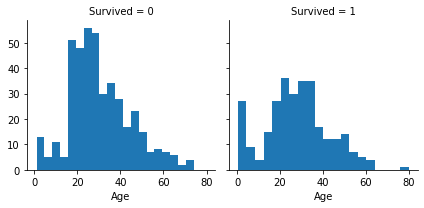

In [12]:
#seabornのFacetGridを使うと簡単にグラフを書くことができる
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)
print(train_df.columns.values)

/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


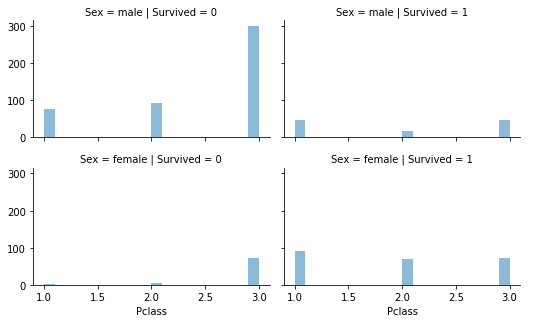

In [13]:
#sizeは図の大きさ　colで列で分ける 
grid=sns.FacetGrid(train_df,col='Survived',row='Sex',size=2.3,aspect=1.6)
grid.map(plt.hist,'Pclass',alpha=.5,bins=20)
grid.add_legend()

/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


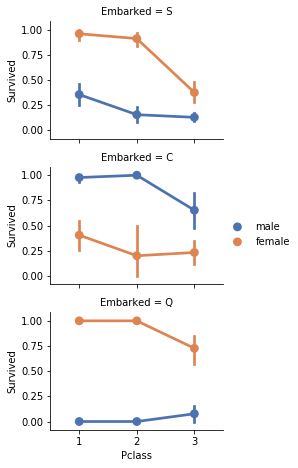

In [14]:
grid=sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.5)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


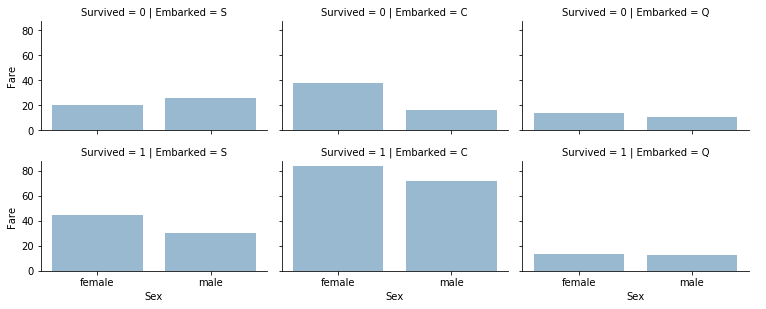

In [15]:
grid=sns.FacetGrid(train_df,col='Embarked',row='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
#train_df.info()
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape


Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [17]:
for dataset in combine:
    #正規表現のパターンで分割するstr.extract,expand=Trueだとpandas.DataFrame [A-Za-z]１桁以上の半角英（a～z、A～Z）にマッチ
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
#pandas.crosstab()関数を使うとクロス集計分析ができる。
pd.crosstab(train_df['Title'],train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    #要素の値を置換するには、replace()
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
#dataset['Title']    
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
title_mapping={'Mr':1,'Miss':2,"Mrs":3,'Master':4,'Rare':5}
for dataset in combine:
    #map("A":"B")でAをBに入れ替える。
    dataset['Title']=dataset['Title'].map(title_mapping)
    #fillna欠損値を他の値に置換
    dataset['Title']=dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [20]:
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name','PassengerId'],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 8))

In [21]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


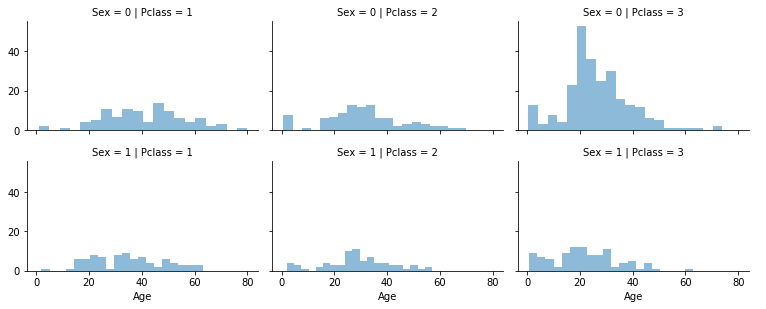

In [22]:
grid=sns.FacetGrid(train_df,col='Pclass',row='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [23]:
guess_ages=np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            #欠損値を除外dropna
            guess_df=dataset[(dataset['Sex']==i)& (dataset['Pclass']==j+1)]['Age'].dropna()
            #median中央値
            age_guess=guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
        
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [24]:
#cut()関数では、第一引数xに元データとなる一次元配列、第二引数binsにビン分割設定を指定する
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

test_df['AgeBand']=pd.cut(test_df['Age'],5)
test_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)


KeyError: "['Survived'] not in index"

In [122]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age']=1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age']=2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age']=3
    dataset.loc[dataset['Age']>64,'Age']=4
    
train_df.head(30)
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16.0]"


In [94]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.322110,0.523008,0.381594,32.204208,1.728395
std,0.486592,0.836071,0.477990,0.820081,1.102743,0.806057,49.693429,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,512.329200,5.000000


In [25]:
train_df=train_df.drop(['AgeBand'],axis=1)
test_df=test_df.drop(['AgeBand'],axis=1)
combine=[train_df,test_df]
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [27]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [28]:
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)

In [29]:
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,7.2500,S,1,0
1,1,1,1,38,71.2833,C,3,0
2,1,3,1,26,7.9250,S,2,1
3,1,1,1,35,53.1000,S,3,0
4,0,3,0,35,8.0500,S,1,1


In [30]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass

train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,66,22,3
1,38,38,1
2,78,26,3
3,35,35,1
4,105,35,3
5,75,25,3
6,54,54,1
7,6,2,3
8,81,27,3
9,28,14,2


In [31]:
#isnull().any(axis=0)で欠損値を確認
train_df.isnull().any(axis=0)
#mode()を使うと、各列・各行の最頻値を取得できる。
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
for dataset in combine:
    #欠損値を他の値に置換（穴埋め）するにはfillna()
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,22,7.2500,0,1,0,66
1,1,1,1,38,71.2833,1,3,0,38
2,1,3,1,26,7.9250,0,2,1,78
3,1,1,1,35,53.1000,0,3,0,35
4,0,3,0,35,8.0500,0,1,1,105


In [34]:
#inplace=Trueにしないと、元のデータに変更は反映されない
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,34,7.8292,2,1,1,102
1,3,1,47,7.0000,0,3,0,141
2,2,0,62,9.6875,2,1,1,124
3,3,0,27,8.6625,0,1,1,81
4,3,1,22,12.2875,0,3,0,66


In [35]:
#量を元にビン分割: qcut()
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [36]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31.0),'Fare']=2
    dataset.loc[dataset['Fare']>31.0,'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)
    
train_df=train_df.drop(['FareBand'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,22,0,0,1,0,66
1,1,1,1,38,3,1,3,0,38
2,1,3,1,26,1,0,2,1,78
3,1,1,1,35,3,0,3,0,35
4,0,3,0,35,1,0,1,1,105


In [47]:
train_df.drop(train_df["Title"],inplace=True)

In [108]:
#train_df["S"]

class1=train_df[train_df["Survived"]==0]
class1["Survived"]=1

class2=train_df[train_df["Survived"]==1]
class2["Survived"]=2

/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [109]:
class1.shape
class1_train=class1[:437]
class1_test=class1[437:]

class2_train=class2[:271]
class2_test=class2[271:]

class1_train.to_csv("Class1-Learn.csv",index=False)
class1_test.to_csv("Class1-Test.csv",index=False)

class2_train.to_csv("Class2-Learn.csv",index=False)
class2_test.to_csv("Class2-Test.csv",index=False)

In [112]:
Large_libsvm_Learn=pd.concat([class1_train,class2_train],axis=0)
Large_libsvm_Test=pd.concat([class1_test,class2_test],axis=0)

Large_libsvm_Learn.to_csv("Large-libsvm_-Learn.csv",index=False)
Large_libsvm_Test.to_csv("Large-libsvm_-Test.csv",index=False)


In [115]:
class2_test.shape

(68, 9)

In [126]:
import seaborn as sns

/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


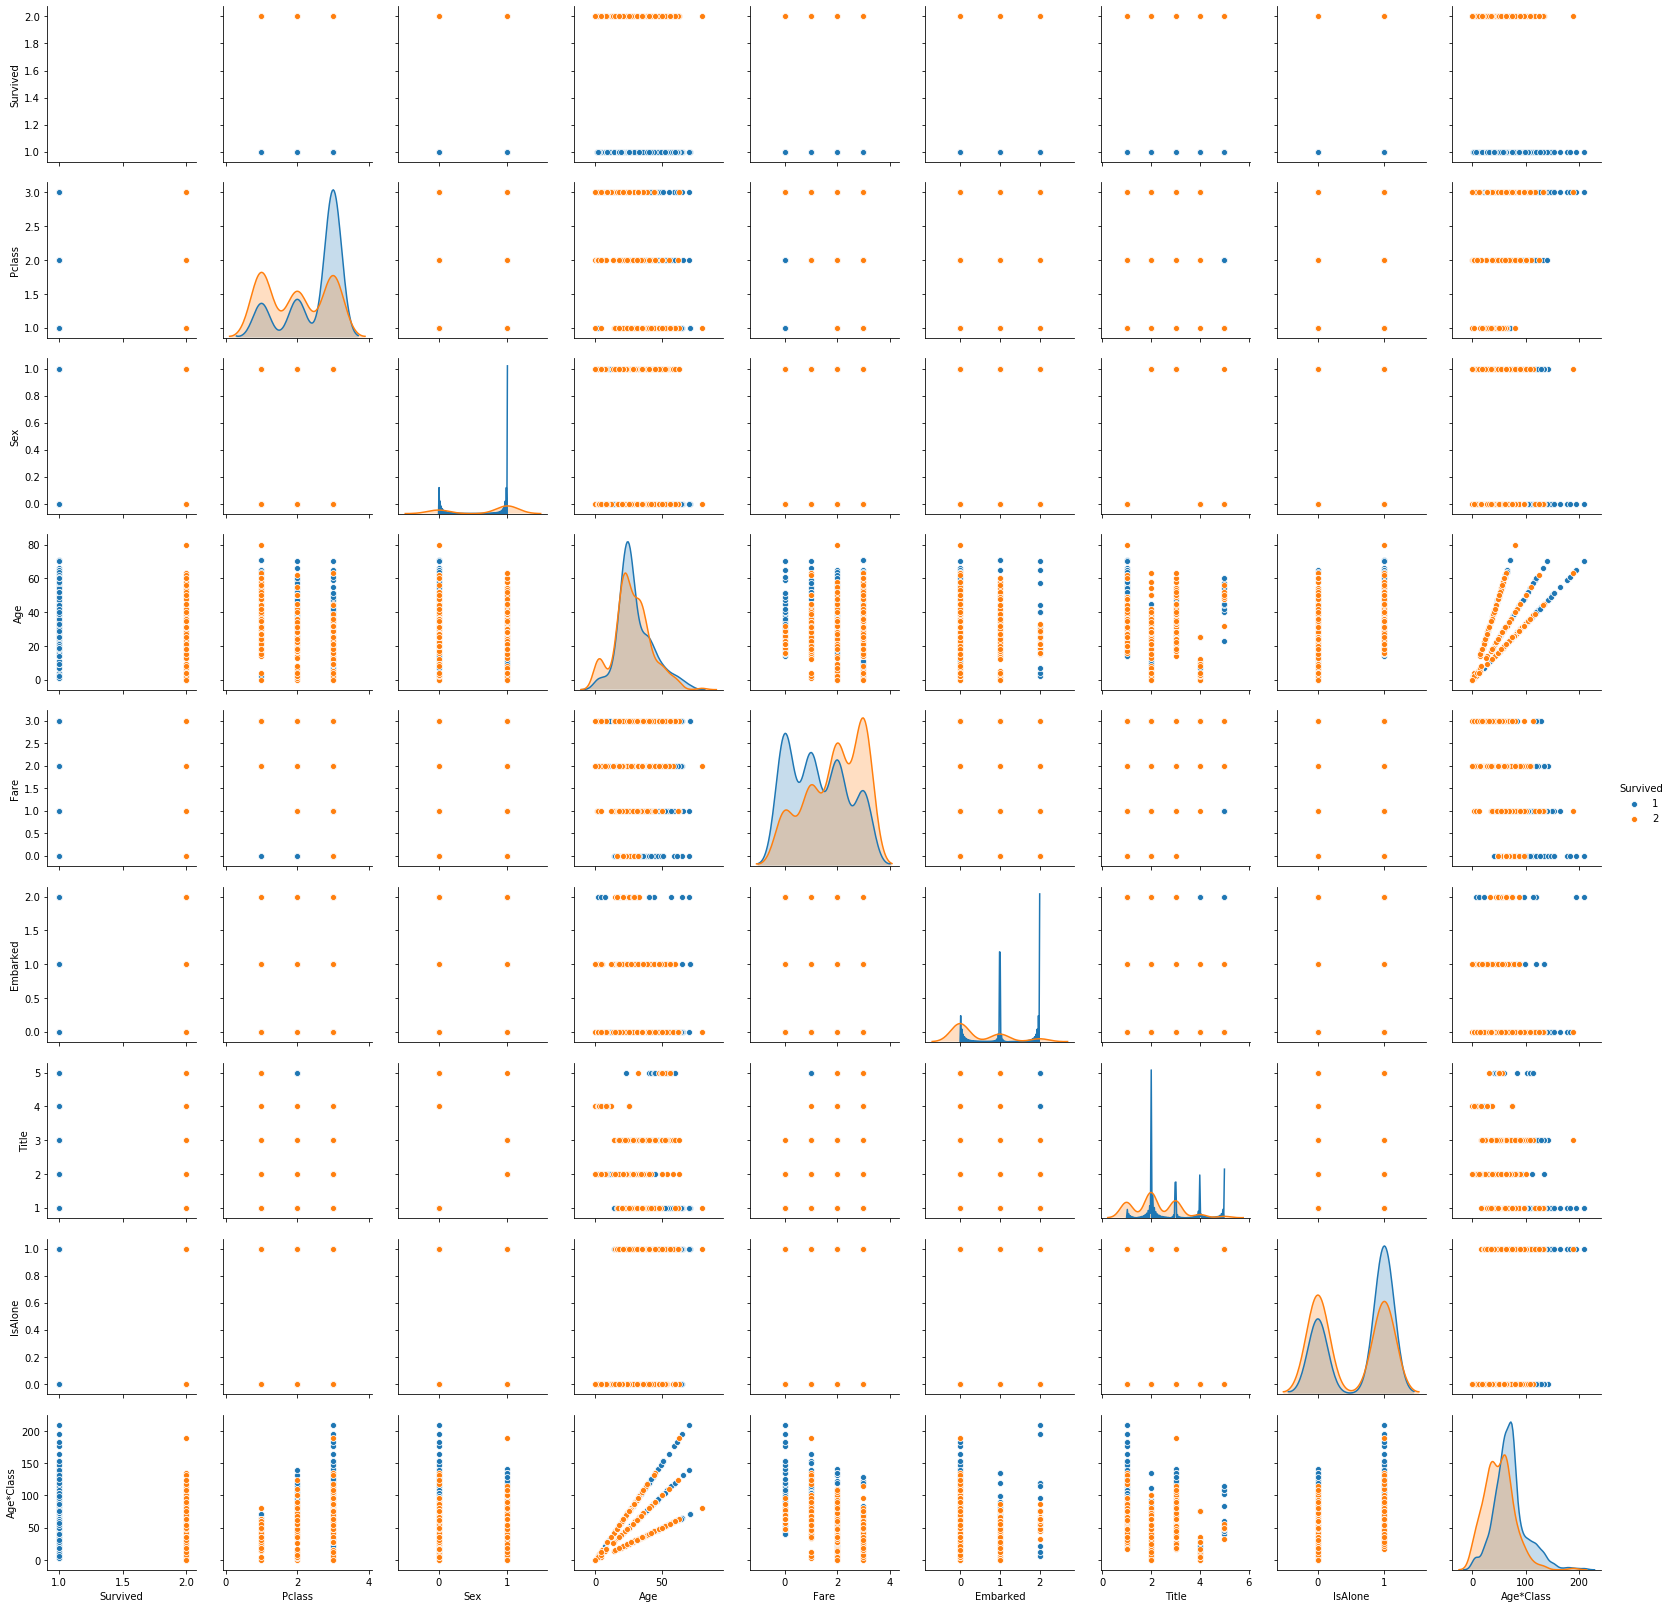

In [130]:
sns.pairplot(Large_libsvm_Learn,hue='Survived')

/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


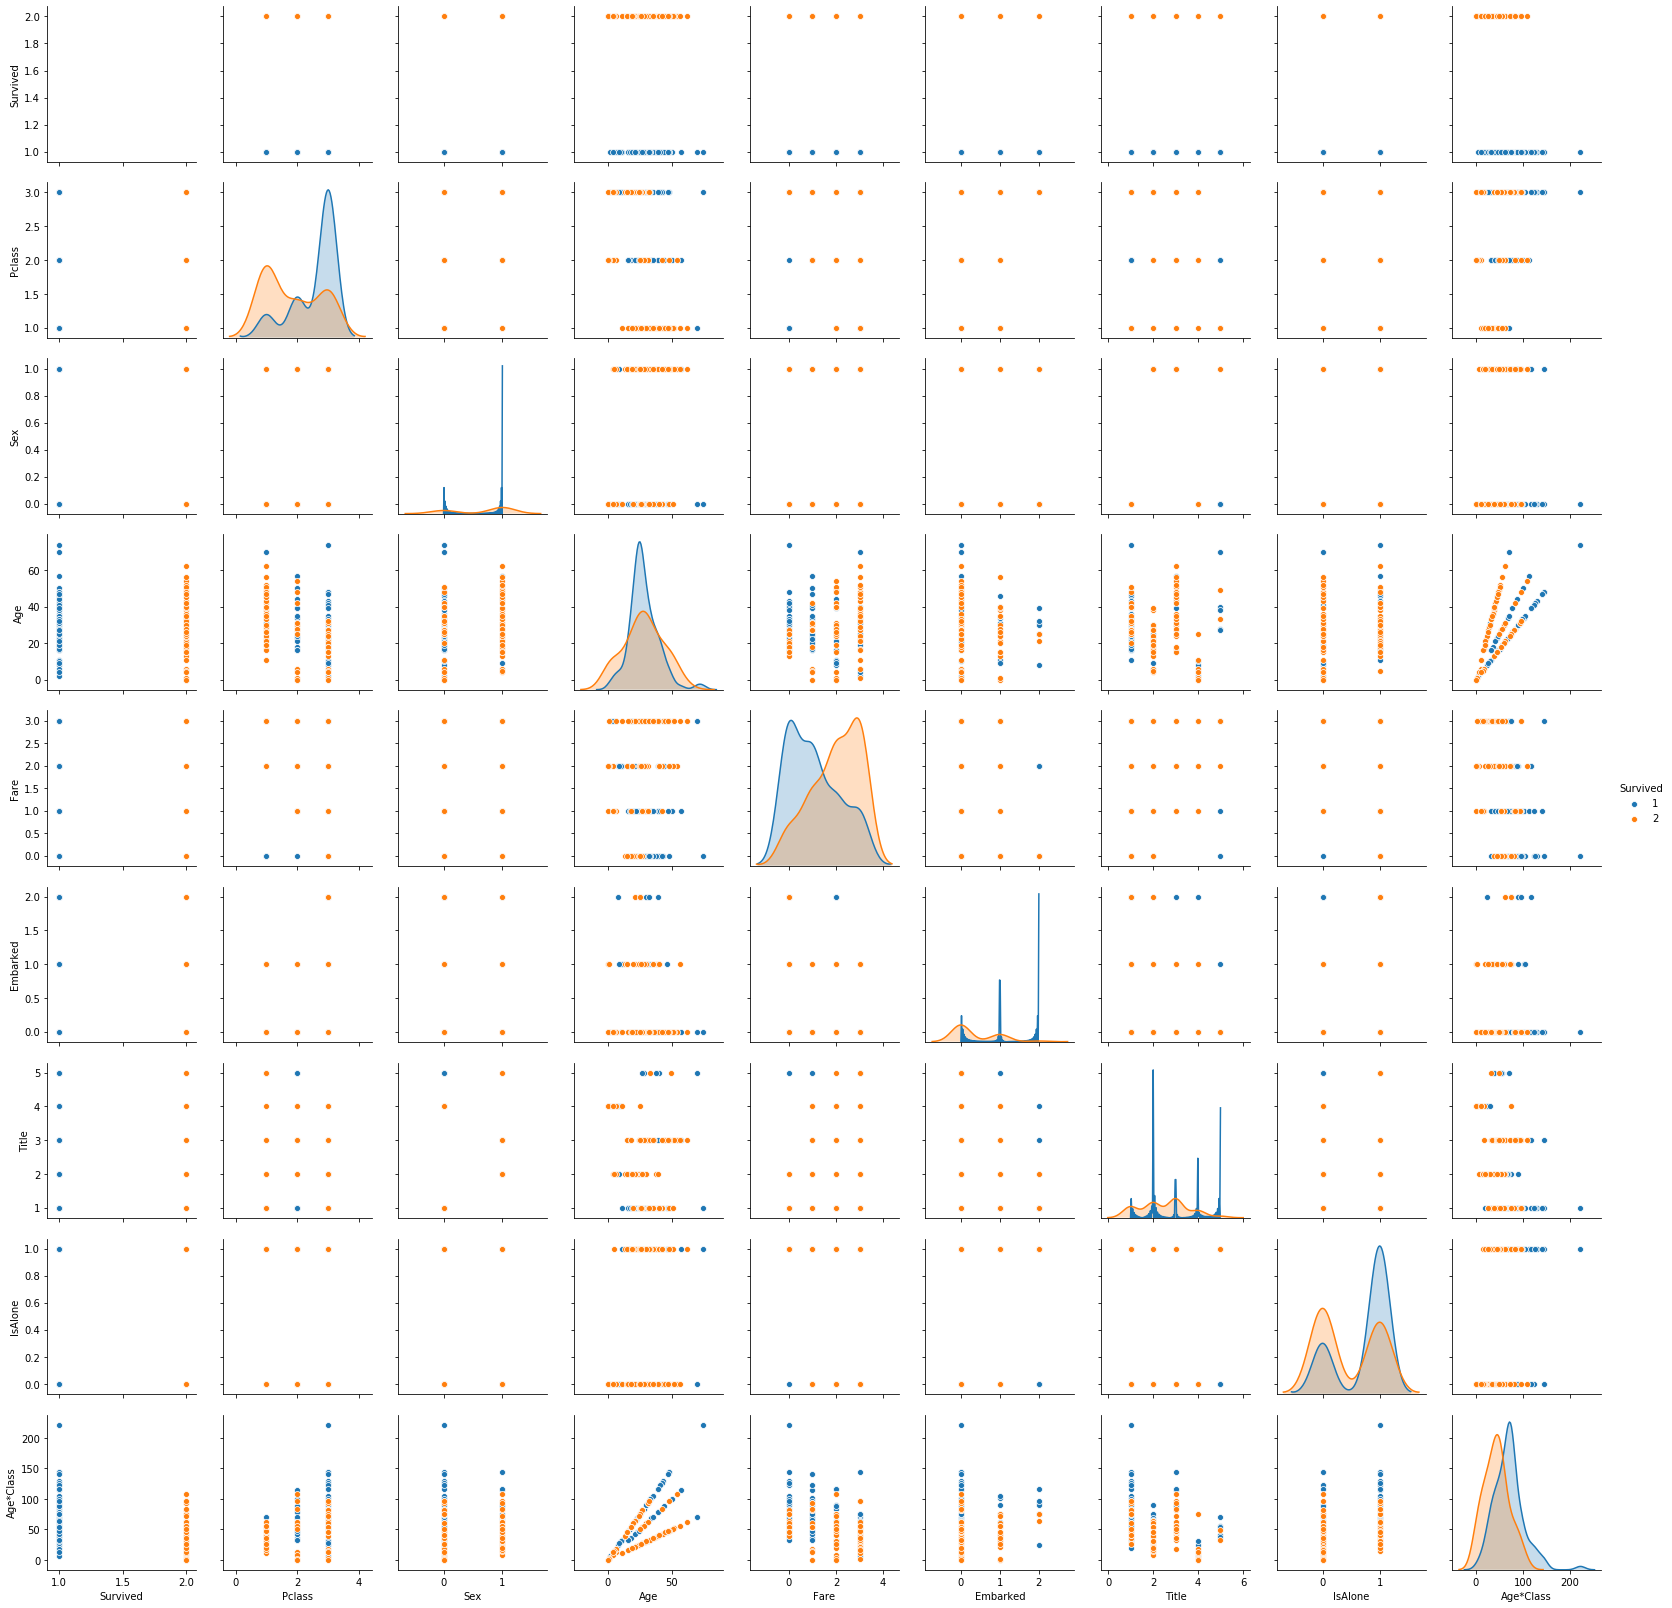

In [131]:
sns.pairplot(Large_libsvm_Test,hue='Survived')